In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'  # default is ‘last_expr’

%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/data/home/marmot/camtrap/PyCharm/CameraTraps-benchmark')
#sys.path.append('/Users/siyuyang/Source/Repos/GitHub_MSFT/CameraTraps-benchmark')

In [3]:
import json
import os

from sklearn.metrics import precision_recall_curve

import numpy as np
from benchmark import model_eval_utils
from data_management import cct_json_utils
from api.batch_processing.postprocessing import load_api_results
from visualization.visualization_utils import plot_precision_recall_curve

# Evaluate empty non-empty classification on the sequence level

Evaluated on the two validation sets using models trained on the respective training set.

In [4]:
def load_json(path):
    with open(path) as f:
        j = json.load(f)
    return j

## SS Season 1

### On validation set

threshold | accuracy
0.5 | 0.8602
0.9 | 0.8860
0.95 | 0.8926
0.98 | 0.9018
0.99 | 0.9078

There are 34819 sequences, 27735 are empty, which is 79.65478617995922%
Number of sequences not in both gt and pred: 0
Evaluating results on 34819 sequences
Accuracy by using 0.5 as confidence threshold: 0.8602199948304087
Number of sequences not in both gt and pred: 0
Evaluating results on 34819 sequences
Accuracy by using 0.99 as confidence threshold: 0.9078376748327063
Precision at 0.9 recall is 0.6903162911611785, at threshold 0.969


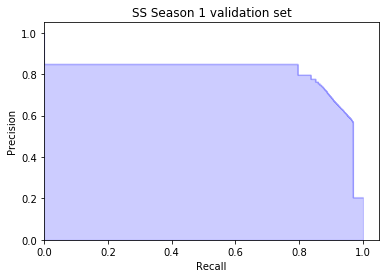

In [8]:
gt_path = '/beaver_disk/camtrap/ss_season1/benchmark/ss_season1_images_20190919_val.json'
detector_output_path = '/home/marmot/camtrap/mnt/intermediate/dataset_paper/detector_results_one_class/SS_season1/detections_ss_1c_detector_ss_val_all_images.json'

gt_db_indexed = cct_json_utils.IndexedJsonDb(gt_path)

model_eval_utils.get_number_empty_seq(gt_db_indexed)

accuracy, gt_seq_level, pred_seq_level = model_eval_utils.empty_accuracy_seq_level(gt_db_indexed, 
                                                                                   detector_output_path,
                                                                                   load_api_results.ss_file_to_file_name,
                                                                                    threshold=0.5)
print('Accuracy by using 0.5 as confidence threshold:', accuracy)

accuracy, gt_seq_level, pred_seq_level = model_eval_utils.empty_accuracy_seq_level(gt_db_indexed, 
                                                                                   detector_output_path,
                                                                                   load_api_results.ss_file_to_file_name,
                                                                                    threshold=0.99)
print('Accuracy by using 0.99 as confidence threshold:', accuracy)

precisions, recalls, thresholds = precision_recall_curve(gt_seq_level, pred_seq_level)

p = plot_precision_recall_curve(precisions, recalls, title='SS Season 1 validation set')

prec_at_recall, th = model_eval_utils.find_precision_at_recall(precisions, recalls, thresholds, recall_level=0.9)
print('Precision at 0.9 recall is {}, at threshold {}'.format(prec_at_recall, th))

### On training set

Just to see...

There are 113407 sequences, 94802 are empty, which is 83.59448711278846%
Number of sequences not in both gt and pred: 34
Evaluating results on 113373 sequences
Accuracy by using 0.5 as confidence threshold: 0.8429343847300503
Number of sequences not in both gt and pred: 34
Evaluating results on 113373 sequences
Accuracy by using 0.99 as confidence threshold: 0.9485327194305523
Precision at 0.9 recall is 0.8517422580480588, at threshold 0.996


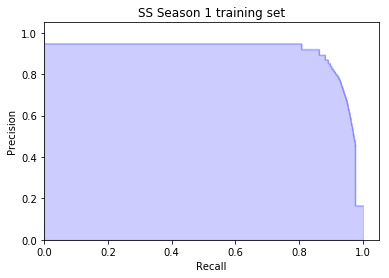

In [9]:
gt_path = '/beaver_disk/camtrap/ss_season1/benchmark/ss_season1_images_20190919_train.json'
detector_output_path = '/home/marmot/camtrap/mnt/intermediate/dataset_paper/detector_results_one_class/SS_season1/331_detections_ss_1c_detector_ss_train_all_images_20191001001617.json'

gt_db_indexed = cct_json_utils.IndexedJsonDb(gt_path)

model_eval_utils.get_number_empty_seq(gt_db_indexed)

accuracy, gt_seq_level, pred_seq_level = model_eval_utils.empty_accuracy_seq_level(gt_db_indexed, 
                                                                                   detector_output_path,
                                                                                   load_api_results.ss_file_to_file_name,
                                                                                    threshold=0.5)
print('Accuracy by using 0.5 as confidence threshold:', accuracy)

accuracy, gt_seq_level, pred_seq_level = model_eval_utils.empty_accuracy_seq_level(gt_db_indexed, 
                                                                                   detector_output_path,
                                                                                   load_api_results.ss_file_to_file_name,
                                                                                    threshold=0.99)
print('Accuracy by using 0.99 as confidence threshold:', accuracy)

precisions, recalls, thresholds = precision_recall_curve(gt_seq_level, pred_seq_level)

p = plot_precision_recall_curve(precisions, recalls, title='SS Season 1 training set')

prec_at_recall, th = model_eval_utils.find_precision_at_recall(precisions, recalls, thresholds, recall_level=0.9)
print('Precision at 0.9 recall is {}, at threshold {}'.format(prec_at_recall, th))

## CCT all images

### On validation set

There are 40603 sequences, 18544 are empty, which is 45.671502105755735%
Number of sequences not in both gt and pred: 0
Evaluating results on 40603 sequences
Accuracy by using 0.5 as confidence threshold: 0.827648203334729
Number of sequences not in both gt and pred: 0
Evaluating results on 40603 sequences
Accuracy by using 0.99 as confidence threshold: 0.858507992020294
Precision at 0.9 recall is 0.8109477124183007, at threshold 0.54


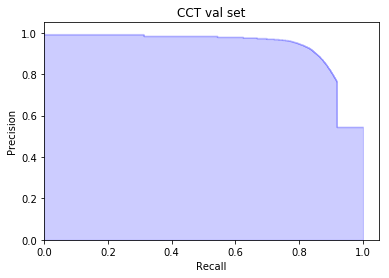

In [10]:
gt_path = '/beaver_disk/camtrap/caltech/benchmark/caltech_images_20190919_val.json'
detector_output_path = '/home/marmot/camtrap/mnt/intermediate/dataset_paper/detector_results_one_class/CCT/2784_detections_cct_1c_detector_cct_val_all_images_20191001000804.json'

gt_db_indexed = cct_json_utils.IndexedJsonDb(gt_path)

model_eval_utils.get_number_empty_seq(gt_db_indexed)

accuracy, gt_seq_level, pred_seq_level = model_eval_utils.empty_accuracy_seq_level(gt_db_indexed, 
                                                                                   detector_output_path,
                                                                                   load_api_results.caltech_file_to_file_name,
                                                                                    threshold=0.5)
print('Accuracy by using 0.5 as confidence threshold:', accuracy)

accuracy, gt_seq_level, pred_seq_level = model_eval_utils.empty_accuracy_seq_level(gt_db_indexed, 
                                                                                   detector_output_path,
                                                                                   load_api_results.caltech_file_to_file_name,
                                                                                    threshold=0.99)
print('Accuracy by using 0.99 as confidence threshold:', accuracy)

precisions, recalls, thresholds = precision_recall_curve(gt_seq_level, pred_seq_level)

p = plot_precision_recall_curve(precisions, recalls, title='CCT val set')

prec_at_recall, th = model_eval_utils.find_precision_at_recall(precisions, recalls, thresholds, recall_level=0.9)
print('Precision at 0.9 recall is {}, at threshold {}'.format(prec_at_recall, th))

There are 140405 sequences, 102604 are empty, which is 73.07716961646665%
Number of sequences not in both gt and pred: 0
Evaluating results on 140405 sequences
Accuracy by using 0.5 as confidence threshold: 0.7466471991738186
Number of sequences not in both gt and pred: 0
Evaluating results on 140405 sequences
Accuracy by using 0.99 as confidence threshold: 0.9263274099925216
Precision at 0.9 recall is 0.4560413034732466, at threshold 0.3


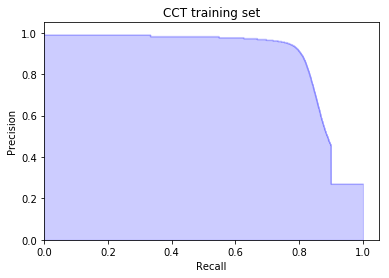

In [11]:
gt_path = '/beaver_disk/camtrap/caltech/benchmark/caltech_images_20190919_train.json'
detector_output_path = '/home/marmot/camtrap/mnt/intermediate/dataset_paper/detector_results_one_class/CCT/detections_cct_1c_detector_cct_train_all_images.json'

gt_db_indexed = cct_json_utils.IndexedJsonDb(gt_path)

model_eval_utils.get_number_empty_seq(gt_db_indexed)

accuracy, gt_seq_level, pred_seq_level = model_eval_utils.empty_accuracy_seq_level(gt_db_indexed, 
                                                                                   detector_output_path,
                                                                                   load_api_results.caltech_file_to_file_name,
                                                                                    threshold=0.5)
print('Accuracy by using 0.5 as confidence threshold:', accuracy)

accuracy, gt_seq_level, pred_seq_level = model_eval_utils.empty_accuracy_seq_level(gt_db_indexed, 
                                                                                   detector_output_path,
                                                                                   load_api_results.caltech_file_to_file_name,
                                                                                    threshold=0.99)
print('Accuracy by using 0.99 as confidence threshold:', accuracy)

precisions, recalls, thresholds = precision_recall_curve(gt_seq_level, pred_seq_level)

p = plot_precision_recall_curve(precisions, recalls, title='CCT training set')

prec_at_recall, th = model_eval_utils.find_precision_at_recall(precisions, recalls, thresholds, recall_level=0.9)
print('Precision at 0.9 recall is {}, at threshold {}'.format(prec_at_recall, th))

For the Caltech Camera Traps dataset, the training set has many more empty images than the validation set.